In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from math import log,exp
import random


from sklearn import datasets
from sklearn import tree

# ---- SPLITTER  
# from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split 
# ---- LEARNER 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn import svm

# ---- METRIQUES
from sklearn import metrics 
from sklearn.metrics import r2_score 

from sklearn.metrics import confusion_matrix

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

### Etape 1 : Obtenir le data  

In [2]:
df0 = pd.read_csv('pointure.data',na_values=['?'])
display(df0)

,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15
5,féminin,168,68.0,20
6,féminin,165,59.0,18
7,féminin,175,68.0,23


### Etape 2 : Explorer le data 

dimensions (8, 4)


,Genre,Taille(cm),Poids(kg),Pointure(cm)
0,masculin,182,81.6,30
1,masculin,180,86.2,28
2,masculin,170,77.1,30
3,masculin,180,74.8,25
4,féminin,152,45.4,15


statistiques
------
        Taille(cm)  Poids(kg)  Pointure(cm)
count    8.000000   8.000000      8.000000
mean   171.500000  70.012500     23.625000
std     10.028531  13.118192      5.629958
min    152.000000  45.400000     15.000000
25%    167.250000  65.750000     19.500000
50%    172.500000  71.400000     24.000000
75%    180.000000  78.225000     28.500000
max    182.000000  86.200000     30.000000


<AxesSubplot:>

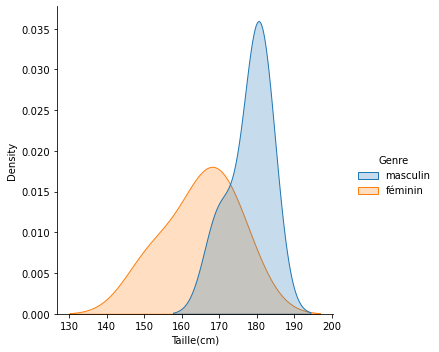

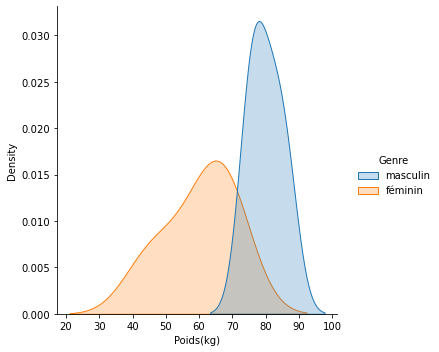

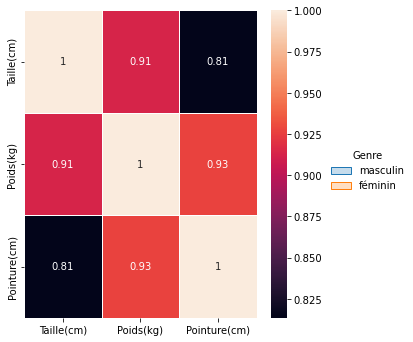

In [41]:
print('dimensions',df0.shape)
display(df0.head(5))
print('statistiques\n------\n',df0.describe())
sns.displot(df0, x="Taille(cm)", hue="Genre", kind="kde", fill=True)
sns.displot(df0, x="Poids(kg)", hue="Genre", kind="kde", fill=True)
sns.displot(df0, x="Pointure(cm)", hue="Genre", kind="kde", fill=True)
matrice_corr = df0.iloc[:,1:4].corr(method='pearson', min_periods=1)
sns.heatmap(data=matrice_corr , annot=True , linewidths=.5)

### Etape 3 : Prétairement des données

In [6]:
# Enlever les valeurs null  
display(df0[df0.isnull().any(axis=1)])
df = df0.dropna()
print(df.shape)

,Genre,Taille(cm),Poids(kg),Pointure(cm)


(8, 4)


### Etape 4 : Définir les features

In [10]:
Features = df.iloc[:,1:4].columns
print(Features)

Index(['Taille(cm)', 'Poids(kg)', 'Pointure(cm)'], dtype='object')


## Apprentissage du modele

### Etape 4 :Algo ML - Apprentissage

In [83]:
x_train = df[Features]
y_train = np.array(df[['Genre']]).ravel()

# --- NAIVE BAYES 
cl = GaussianNB()
cl.fit(x,y)

GaussianNB()

## Evaluez algorithme

## Etape 5 :Prédiction test

In [49]:
y_pred = cl.predict(x_train)
c = confusion_matrix(y_pred,y_train)
print(c)

[[4 0]
 [0 4]]


In [69]:
x_test = [[183,59,20]] 
y_pred = cl.predict(x_test)
print(y_pred)

['féminin']


In [82]:
#filter = (df['Taille(cm)'] ==182 or df['Poids(kg)'] ==59)
display((df['Taille(cm)'] ==182) | (df['Poids(kg)'] ==59))
display(np.logical_or(df['Taille(cm)'] ==182, df['Poids(kg)'] ==59))




0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
dtype: bool

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
dtype: bool